# lo que vas a aprender 
- crear un NN desde 0 para resolver un problema de clasificacion 
- crear una clase para crear capas de neuronas
- una funcion para crear una NN
- crear un funcion lambda donde definiremos la act_f y cost_f con su derivada
- aprenderas que en una NN hay 7 funciones importantes que definiran el proceso de prediccion(forward pass) y aprendisaje(backward pass): Z= xw+b, act_f, funcion de coste , delta para la ultima capa, delta para las otras capas, 2 formula para calcular las derivadas parciales del coste respecto a los parametros W y B (al unir estos dos resultados tendremos el gradiente) 
- definir las operaciones que realiza en forward pass una NN: z=xw+b, act_f(z). y conectar el output de una capa con el input de otra
- definir las operaciones del forward pass(entrenamiento= optimizacion de parametros): evaluar el error de cada capa(calculando delta), calcular el gradiente en base a delta de cada capa y usar el gradiente para optimizar los parametros W y B 
- manipular un generador de dataset, 
- entender un dataset que tiene una x (con valores d ecordenadas) y un array y con valores binarios que diferencian un circulo de otro
- entenderas que se le da de input a una red neuronal (500,2) = (batch, size), como se procesa el array en cada capa y por que cambia de forma al realizar una operacion entre arrays (que pasa cuando x*w+b, act__f(z), ) que significa el resultado de delta y que significa el reultado del gradiente 
- aprenderas a hacer operaciones de multiplicacion de arrays, suma de arrays (si importa la shape y la modifica)y  pasar un array por una funcion (no importa la shape y no la modifica)
- aprenderas a que propiedades o dimensiones tiene que tener 2 arrays para ser operados, y que hacer para corregirlo 
# nuevas funciones 
-  usamos una seleccion fancy, usando de mascara el vector y, para visualizar el dataset (ver Indexado fancy en np array)    
plt.scatter(x[y[:,0]==0,1], x[y[:,0]==0,0], color="skyblue") 
- utilizar las librerias para congelar el tiempo de jecucion en cada iteracion (time) y otra para limpiar los inputs y que no se acumulen (clear_output)    
import time     
from IPython.display import clear_output
-  borra el output (las graficas)     
clear_output(wait=True)
- nos da medio segundo antes de avanzar a la siguiente iteracion      
time.sleep(.1) 

# cosas que no entendi 
- pense que esta formula era act_f[1](z) pero si le pongo z no funciona la red      
deltas.insert(0, (deltas[0] @ W_.T) * nn[o-1].act_f[1](a))


In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc 


sklearn.datasets.make_circles   
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

Xndarray of shape (n_samples, 2)
The generated samples.

yndarray of shape (n_samples,)
The integer labels (0 or 1) for class membership of each sample.



```
x, y = make_circles(10, noise=.05, factor=0.3)
print(x)
print(y)

el array x > contiene cajitas con los las cordenadas de [x,y] de los dos circulos 
el array y > contiene la informacion que indica que datos del array x pertencen al circulo pequeño y cual al grande, es un filtro o mascara util para hacer indexado fanci(ver archivo de numpy array)
[[ 1.01748249  0.02170908] ->  circulo indice 0(circulo pequeño) [eje x, eje y]
 [-0.7804423   0.59416905]
 [ 0.16903965 -0.26965336] ->  circulo indice 1(circulo grande) [eje x, eje y]
 [ 0.23885671 -0.94467542]
 [ 0.01277502  0.32563011]
 [-0.84496264 -0.67222624]
 [ 0.29549041 -0.01482447]
 [ 0.29367767  0.98833299]
 [-0.35132898  0.27543233]
 [-0.20486817 -0.20185959]]
[0 0 1 0 1 0 1 0 1 1]  indice que indica la cordena de cada cordenada del circulo
```




(500, 1)


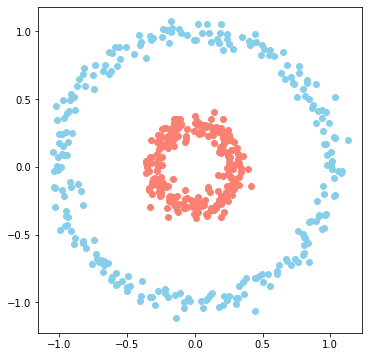

In [ ]:


n = 500 # numero de muestras 
# la red estara diseñada para resibir muestras (1, 2) : (batch size, muestras) y generara (1, 1) : (batch size, prediccion)
# en este caso el batch size es arbitrario y por lo tanto puede recibir vectores de (500,2),(1,2), (10,2) por lo tanto la primera dimencion indicara batch size y es arbitrario 
p = 2 # numero de caracteristicas por cada muestra, la red
x, y = make_circles(n_samples=n , noise=.05, factor=0.3 )
y = y.reshape(500,1) # necesitamos que el array sea una matriz columna (500,1) y no una serie (500,) ya que si no al momento de operarla en la funcion de coste nos dara un array ilogico  (500, 500)
print(y.shape)
plt.scatter(x[y[:,0]==0,1], x[y[:,0]==0,0], color="skyblue") # usamos una seleccion fancy, usando de mascara el vector y
plt.scatter(x[y[:,0]==1,1], x[y[:,0]==1,0], color="salmon")
plt.axis("scaled")
#plt.axis("off")
plt.rcParams["figure.figsize"] = (8, 6)

plt.show()


# creamos la unidad basica de procesamiento, una capa
vamos a manejra los datos en forma de arrays, por lo tanto tenemos que considerar que la unidad basica sera una capa, lo que define una capa es:
- n de conexiones con la capa anterior
- n de neuronas en la capa actual 
- fucnion de activacion 
- pesos w y b

los pesos se definiran de forma aleatoria al inciiar el objeto, solo tenemso que definir sus dimenciones, aqui es importante especificar bien la forma de cada array, para que la suma se realize bien. en todo caso DOT CSV tiene problemas al final y el no definir bien estas dimenciones se podria corregir con una transpuesta. 

```
# supongamos que tenemos 3 neuronas (3 sumas ponderadas) y 5 conexiones atras (# W)
np.random.seed(1)
a = np.random.rand(5, 3) # (n_conn, n_neur)
b = np.ones((1, 3))
c = a + b # corregi las dimenciones de los arrays a,b hasta que se pudiera ejecutar la suma
print("array W:  \n", a)
print("array b:  \n", b)
print("array w + c: \n ", c)

result: 
array W: shape (5,3) # cada valor de la columna representa los pesos d euna neurona
# cada fila representa el vector de W1,W2,Wn
 [[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]]
array b: shape(1,3)
# cada valor representa el valor del bias de cada neurona   
 [[1. 1. 1.]]
 # vemos como la suma se ejecuta sin problemas 
array w + c: 
  [[1.417022   1.72032449 1.00011437]
 [1.30233257 1.14675589 1.09233859]
 [1.18626021 1.34556073 1.39676747]
 [1.53881673 1.41919451 1.6852195 ]
 [1.20445225 1.87811744 1.02738759]]

```

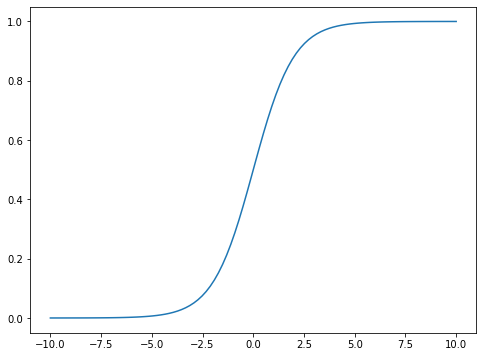

In [ ]:
"""definimos la act_f """
# en una funcion lambda de python, en [0] la funcion, [1] la derivada 
sigm = (lambda x: 1/(1 + np.e ** (-x)),
       lambda x: x * (1 - x))
# relu = lambda x: np.maximum(0, x)
espacio_l = np.linspace(-10,10,100) # creamos 100 valores entre -10,10 para graficar la funcion sigmoide
plt.plot(espacio_l, sigm[0](espacio_l))
plt.show()

"""definimos la funcion de coste con su derivada """
loss = (lambda yp, yr: (np.mean((yp-yr)**2)),
       lambda yp, yr: (yp-yr)) # derivada 

In [ ]:
""" creamos una clase que funcionara como estructura de datos de una capa"""
class layer():
  def __init__(self, n_conn, n_neur, act_f):
    #self.n_conn = n_conn
    self.n_neur = n_neur
    self.act_f = act_f
    # debido a que los datos del dataset x van desde -1 a 1 tenemos que normalizar (0:1) > (-1:1)
    self.b = np.random.rand(1, n_neur)     * 2 - 1    
    self.w = np.random.rand(n_conn, n_neur)* 2 - 1


In [ ]:
#podriamos definir nuestra NN capa x capa asi:
# l0 = layer(p, 4, sigm)
#l1 = layer(4, 8, sigm)
#en este punto nos damos cuenta que seria mas viable crear un bucle for y automatizar todo
"""creamos una fucnion para crear la NN"""
def create_nn(topology, act_f):
  nn = []
  for i, l in enumerate(topology[:-1]): # indicamos que recorra todo hasta -1
    nn.append(layer(topology[i], topology[i+1] , act_f))
  return nn

# ejemplo
topology = [p, 4, 8, 16,1]
neu_n = create_nn(topology, sigm)
for l in neu_n:
  print("w \n", l.w.shape)
  print("b \n", l.b.shape)

w 
 (2, 4)
b 
 (1, 4)
w 
 (4, 8)
b 
 (1, 8)
w 
 (8, 16)
b 
 (1, 16)
w 
 (16, 1)
b 
 (1, 1)


# multiplicacion de matrices 
para multiplicar 2 matrcies su multplicacion debe estar **definida**.   
Entonces, para que la multiplicación de matrices esté definida, **el número de columnas en la primera matriz debe ser igual al número de renglones en la segunda matriz**.
[multiplicacion definida](https://es.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:properties-of-matrix-multiplication/a/matrix-multiplication-dimensions)


```
matriz A: shape (3, 2), tiene  2 columnas 
[[0 1]
 [2 3]
 [4 5]]

matriz B: shape (2, 4), tiene 2 renglones
[[0 1 2 3]
 [4 5 6 7]]

A * B es una multplicacion definida 
```
supongamos que tenemos. sacado de [The ‘@’ operator = matmul](https://likegeeks.com/es/multiplicacion-matriz-numpy/#The_operator)


```
Matrix A:
[[ 6  3]
 [12 14]
 [10  7]], shape=(3, 2)
Matrix B:
[[12  4  6  9]
 [ 2  6 10 10]], shape=(2, 4)
product of A and B:
[[ 78  42  66  84]
 [172 132 212 248]
 [134  82 130 160]], shape=(3, 4)
 
 ```
a continuacion expplicaremos como se obtiene cada digito de multplicacion. sacado de [como multiplicar matrices](https://ekuatio.com/como-multiplicar-matrices/)


```
el primer 78 se obtubo de multiplicar el primer renglon * la primera columna 
78 = (6*12) +(3*2) 
el 42 resulto de multiplicar el primer renglon * la segunda columna 
42 = (6*4)+(3*6)
el 172 resulto de multiplicar el segundo renglon * la primera columna 
172 = (12*12) + (14*2)

```
como vemos tenemos que multiplicar el 1er renglon de A * cada columna de B, despues el 2do renglon de A * cada columna de B, y asi consecutivamente, **al final obtendremos una nueva matriz renglones = a y columnas = b** 

# multiplicacion de matrices en nuestra red 
si analizamos la regresion lineal de la primera capa de nustra red, esta realiza la siguiente operacion z = w*x + b
antes comprobamos que w + b si se podia realizar, ahora solo queda saber si como dijimos atras, la multiplicacion de w * x esta definida. para esto revisamos la shape de los dos:
- x: shape = (500,2) son 500 datos, con cordenadas x, y para graficar 
- w: shape = (2, 4) 2 proviene del valor de p indicado en topology (numero de caracteristicas, valor x,y), 4 proviene del # neuronas.
## ten en consideracion que w * x es diferente de x * w debido a la definicion de multiplicacion(ver arriba)
- x * w, (500,2) * (2, 4): no es valido ya que arroja un error. debido a que x tiene 500 renglones y w tiene 4 columnas, asi lo indica el error de abajo (recordar que matmul es = @)    
`matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 500 is different from 4)`
- w * x, (2, 4) * (500,2): es valido ya que w tiene 2 renglones y x tiene 2 columnas. **El numero de afuera y el de adentro deben ser el mismo (2, 4)*(500, 2)**

### multiplicacion de 2a capa 
w * x (4, 8) * ()

# topologia de nuestra NN
cree una funcion para visualizar informacion denuestra red al crearla.


```
train(nen, cost, x, y, info=True)

red neuronal topologia:  [2, 4, 8, 16, 1] , # de capas:  4
capa numero  0
numero de neuronas:  4
shape de w:  (2, 4)
shape de b:  (1, 4)
conex_atras:  (500, 2) # es el x que recibe cada neurona
z shape:  (500, 4) , a shape:  (500, 4)
--------------------------------------------------
capa numero  1
numero de neuronas:  8
shape de w:  (4, 8)
shape de b:  (1, 8)
conex_atras:  (500, 4) # es el x que recibe cada neurona
z shape:  (500, 8) , a shape:  (500, 8)
--------------------------------------------------
capa numero  2
numero de neuronas:  16
shape de w:  (8, 16)
shape de b:  (1, 16)
conex_atras:  (500, 8) # es el x que recibe cada neurona
z shape:  (500, 16) , a shape:  (500, 16)
--------------------------------------------------
capa numero  3
numero de neuronas:  1
shape de w:  (16, 1)
shape de b:  (1, 1)
conex_atras:  (500, 16) # es el x que recibe cada neurona
z shape:  (500, 1) , a shape:  (500, 1)
```
insights 
### razon por la cual no entendia mi red
yo esperaba que el resultado de la funcion de activavion de la 1ra capa fuera una matriz (1, 4), ya que solo esperaba un solo resultado x cada neurona, sin embargo sucede lo siguiente. **hay que entender que la regresion lineal simple no se aplica a una sola neurona si no a  toda la capa en forma de una operacion matrcial**, por lo tanto analizemos las dimenciones de nuestra informacion al pasar por cada operacion de la 1ra capa:
## revisando las dimeciones en las operaciones 
1. z = wx + y: (500, 4) = (2, 4) * (500,2) + (1,500). las dimensiones de RLS matricial es una matriz donde aumentan las dimenciones. 
2. a = 1/(1 + np.e ** (-z)): (500, 4) = 1/(1 + np.e ** (-(500, 4))). al pasar una la matriz por la funcion de activacion esta conserva su forma ya que la funcion se aplica a cada valor del array. 

por lo tanto el resultado final que se obtiene en cada capa tiene las dimesiones de (500, #neuronas) 


# objetivo  de nuestra red 
el objetivo final con nuestra NN es poder ajustar sus pesos para que pueda realizar predicciones cuando le demos un input y ella nos devuelva un output acertado. para hacer esto necesitamos:
- **el vector gradiente** el cual necesita 
- **valores de delta**, el cual necesita 
- **la derivada de la funcion de activacion y la funcion de coste, el resultado de la funcion de activacion de cada capa**, y esto ultimo necesita. 
-  l**a funcion de regresion lineal (z) de cada capa**

# Forward pass 
lo primero sera hacer pasar  nuestra informacion del input por la red, para que apartir de un input x´ obtengamos un y´(prediccion) realizando a su paso las operaciones internas que se realizan en cada capa, en general solo se realizan 2 operaciones o funciones:
1. regresion lineal simple: z = w * x + y 
2. funcion de activacion(sigmoide en este caso): a = 1/(1 + np.e ** (-z))    
al final de esto deberiamos obtener una lista con todos los valores de (z, a)

# backward pass
ahora toca hacer la optimizacion de los parametros, apartir de la prediccion realizada atras matriz ((z, a))tendremos que obtener los valores de delta para cada capa que si recordamos el archivo "2 redes nueronales.docx"  delta = al error imputado a cada neurona de una capa, y por lo tanto es necesario para calcular el decenso del gradiente. asi que tenemos 2 operaciones a realizar: 
1. calculo de deltas: esto se realiza con las ecuaciones A y B de la imagen de abajo. 
2. caluclo de el gradiente con respecto a cada parametro (w y b):  recordemos que el gradiente es un vector de direccion que nos indicara cuanto variar nuestros parametros para que se optimicen. para esto ocuparemos la ecuacion C y D. 
3. al final solo tendremos que restar el gradiente a nuestros parametros. w - gradienteW. b - gradienteB. 

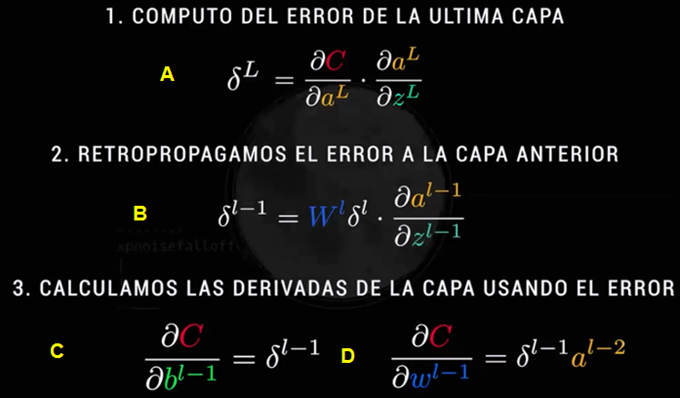

entrenar una NN tiene 3 pasos fundamentales:
- fordward pass: paso hacia adelante: le daras un input y pasara por funciones:Z,act_f y al final tendras un outpu
- backward pass : paso hacia atras: el output lo comparas con el vector Y real o esperado, usaras la funcion de coste 
- backpropagation: se calcularan las derivadas parciales (decenso del gradiente) en base a la funcion de coste y delta, para optimizar los parametros

In [ ]:
from numpy.core.numeric import True_
""" creamos una funcion que realice el forward pass (prediccion) y el backward pass(entrenamiento)"""
# funcion para obtener informacion de la red 
def info_nn(nn, i, z, a, outs): 
  print("capa numero ", str(i))
  print("numero de neuronas: ", nn[i].n_neur)
  print("shape de w: ", nn[i].w.shape)
  print("shape de b: ", nn[i].b.shape)
  print("conex_atras: ", outs[-1][1].shape, "# es el x que recibe cada neurona") 
  print("z shape: ", z.shape, ", a shape: ", a.shape)
  print("-"*50)


def train(nn, loss, x, y, lr=0.1, info=False, train=True):
  """ forward pass"""
  outs = [(None, x)]
  # print("red neuronal topologia: ", topology, ", # de capas: ", len(nn))
  for i, l in enumerate(nn):
    z =  outs[-1][1] @ nn[i].w + nn[i].b
    a = nn[i].act_f[0](z)
    
    if info:
      info_nn(nn, i, z, a, outs)
    
    outs.append((z, a)) # len(outs) al final es = 5 
  # print(loss[0](y, outs[-1][1])) # valor de la funcion de perdida 
  #creamos un parametro para cuando train=True se entrene de lo contrario solo queremos una prediccion
  if train:
    """ backward pass"""
    deltas = []
    for o in reversed(range(1, len(outs))): # iria de 4 - 1 en el de DOTCSV va de 3 - 0 
    # aqui tienes que tener en cuent 2 rangos de indices: outs 0 - 4 y nn 0 - 3 con una topology = [p, 4, 8, 16, 1]
      z = outs[o][0] 
      a = outs[o][1]
      # print(a.shape) # con esta linea comprobamos que los indices los estemos obteniendo correctamente para usarlos ahora en los deltas
      if o == len(outs) - 1:
        deltas.insert(0, loss[1](a, y) * nn[o - 1].act_f[1](a))
      else: 
        deltas.insert(0, (deltas[0] @ W_.T) * nn[o-1].act_f[1](a)) # pense que esta formula era act_f[1](z) pero si le pongo z no funciona la red 
      W_ = nn[o - 1].w # creamos una copia para que arriba no calculemos el delta respecto a un valor de w ya optimizado
      """optimizacion de parametros con gradient decent """
      nn[o - 1].b = nn[o - 1].b - np.mean(deltas[0], axis = 0, keepdims=True) * lr
      nn[o - 1].w = nn[o - 1].w - outs[o-1][1].T @ deltas[0] * lr # la multiplicacion matricial outs[out-1][1].T @ deltas[0] =(500, 16) @ (500, 500) los dos 500 deben quedar adentro (16,500) @ (500, 500)
  return outs[-1][1]

topology = [p, 4, 8, 16, 1]
red_p = create_nn(topology, sigm)
for ab in range(3):
  prediccion = train(red_p, loss, x, y, lr=0.1, info=False, train=True)
  #print(prediccion)
  print("*"*100)


****************************************************************************************************
****************************************************************************************************
****************************************************************************************************


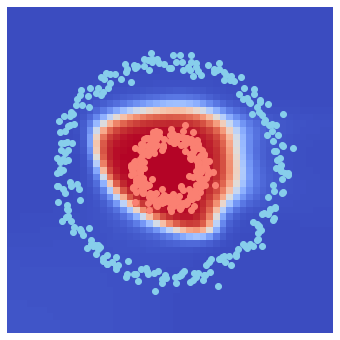

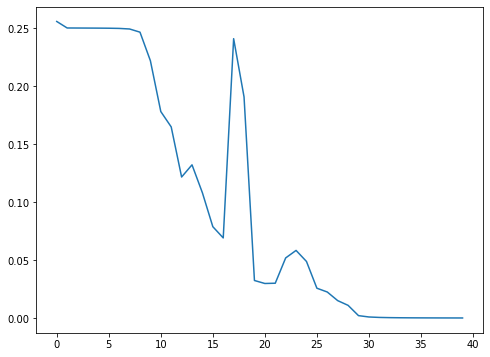

In [ ]:


import time
from IPython.display import clear_output

topology = [p, 3,6,12, 1]
nen = create_nn(topology, sigm)




coste = []

for n in range(1000):
  pY = train(nen, loss, x, y, lr= 0.09, info=False, train=True)
  if n % 25 == 0: # cada 25 pasos en el bucle entra aqui
    print("epoca= ", n)
    coste.append(loss[0](pY, y))
    res = 50
    _x1 = np.linspace(-1.5, 1.5, res)
    _x2 = np.linspace(-1.5, 1.5, res)
    _y  = np.zeros((res, res))
    for i0, x0 in enumerate(_x1):
      for i1, x1 in enumerate(_x1):
        # presta atencion como nuestra NN fue diseñada para apartir de un array (1, 2)crear un  array (1,1)
         # como aqui abajo, la diferencia es que en el entreniamiento utilizamos (500, 2) para crear un  array (1,500)
         # el numero 500 solo representa el batch size, pero en teoria le podemos suministra un array (n, 2)crear un  array (1,n)
        _y[i0][i1] = train(nen, loss, np.array([[x0, x1]]), y, info=False, train=False)[0][0]
    
    plt.pcolormesh(_x1, _x2, _y, cmap="coolwarm")
    plt.axis("scaled")

    plt.scatter(x[y[:,0]==0,1], x[y[:,0]==0,0], color="skyblue") 
    plt.scatter(x[y[:,0]==1,1], x[y[:,0]==1,0], color="salmon")
    plt.axis("off")
    plt.rcParams["figure.figsize"] = (8, 6)
    clear_output(wait=True) #   borra el output (las graficas)
    time.sleep(.1) #nos da medio segundo antes de avanzar a la siguiente iteracion



# los errores mas famosos 
la mayoria de los errores se produciran al realizar una multiplicacion matricial por ejemplo: 



```
nn[out-1].w = nn[out-1].b - outs[out-1][1].T @ deltas[0] * lr 
# la multiplicacion matricial outs[out-1][1] @ deltas[0] =(500, 16) @ (500, 500) los dos 500 deben quedar adentro (16,500) @ (500, 500)

el error que nos arrojo fue : 
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 500 is different from 16)

```
**se corrigio agregando una transpuesta**


otro error resulta de que algun indice se sale del rango, yo los coregi durande el codigo gracias a que defini el rango de mi bucle, y el rango de los indices de las listas que iba a ocupar 



```
for out in reversed(range(1, len(outs))): # el bucle iria de 4 - 1 en el de DOTCSV va de 3 - 0 
    # aqui tienes que tener en cuenta 2 rangos de inidces que vamos a ocupar:
    # outs 0 - 4 y nn 0 - 3 con una topology = [p, 4, 8, 16, 1]
```
otro error famoso se produce por las dimenciones del vector y. 
en un paso queriamos operar dos matrices 


```
deltas.insert(0, (deltas[0] @ W_) * nn[out-1].act_f[1](z))
consultando la shape vemos que la multiplicacion es = (500, 500) @ (16, 1)
como vemos no hay forma de que la multiplicacion este definida ni transponiendo,

si rastremos el problema mas atras vemos que las dimenciones de delta[0] probienen de:
deltas.insert(0, loss[1](a, y) * nn[out-1].act_f[1](z))
especificamente de esta operacion: 
loss[1](a, y)
print(loss[1](a, y).shape, y.shape) # (500, 500) (500,)

el erro que arroja es ⁉ matmul: 
Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 500)
```
en este caso tenemos que tener experiencia manejando arrays y saber que el input y output del dataset no puede tener las dimenciones(500,2) y (500,).
en este caso el array "y" es una serie  y no una matriz columna, que es lo que necesitamos.
esto se solucionando pasando el array de (500,) >(500,1)

y = y.reshape(500,1)

si volvemos a ejecutar el print de arriba saldria, por lo caul ahora si la multiplicacion esta definida. 
```
print(loss[1](a, y).shape, y.shape) #(500, 1) (16, 1)

solo que tendremos lo mismo que el primer problema pero ya sabemos que solo tenemos que usar la transpuesta. para pasar de : (500, 1) @ (16, 1) > (500, 1) (1, 16)
(deltas[0] @ W_.T) 
```








In [ ]:
for a in reversed(range(1, 5)):
  print(a)
va =True 
if va: 
  print("va es True, esto sirve para usar como parametro de una funcion")
appe = []
inser = []
for i, n in enumerate(range(1,11)):
  appe.append(n)
  inser.insert(0,n)

print("append: ", appe)
print("insert: ", inser)

  